In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [75]:
crime_seoul = pd.read_csv('../csv-data/crime_seoul_2.csv', encoding = 'utf-8')
crime_seoul

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,Unnamed: 11
0,중구,2,2,3,2,105,65,"1,395",477,"1,355","1,170",NaN
1,종로구,3,3,6,5,115,98,"1,070",413,"1,278","1,070",NaN
2,중구,1,0,6,4,65,46,"1,153",382,869,794,NaN
3,서대문구,2,2,5,4,154,124,"1,812",738,"2,056","1,711",NaN
4,종로구,3,2,5,4,96,63,"1,114",424,"1,015",861,NaN
5,용산구,5,5,14,14,194,173,"1,557",587,"2,050","1,704",NaN
6,성북구,2,2,2,1,86,71,953,409,"1,194","1,015",NaN
7,동대문구,5,5,13,13,173,146,"1,981",814,"2,548","2,227",NaN
8,마포구,8,8,14,10,294,247,"2,555",813,"2,983","2,519",NaN
9,영등포구,14,12,22,20,295,183,"2,964",978,"3,572","2,961",NaN


In [76]:
del crime_seoul['Unnamed: 11']

In [77]:
crime_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
구별       31 non-null object
살인 발생    31 non-null int64
살인 검거    31 non-null int64
강도 발생    31 non-null int64
강도 검거    31 non-null int64
강간 발생    31 non-null int64
강간 검거    31 non-null int64
절도 발생    31 non-null object
절도 검거    31 non-null object
폭력 발생    31 non-null object
폭력 검거    31 non-null object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [78]:
crime_seoul['절도 발생'] = crime_seoul['절도 발생'].apply(lambda x: x.replace(',',''))
crime_seoul['절도 검거'] = crime_seoul['절도 검거'].apply(lambda x: x.replace(',',''))
crime_seoul['폭력 발생'] = crime_seoul['폭력 발생'].apply(lambda x: x.replace(',',''))
crime_seoul['폭력 검거'] = crime_seoul['폭력 검거'].apply(lambda x: x.replace(',',''))

#crime_seoul['절도 발생'] = pd.to_numeric(crime_seoul[''])



In [79]:
crime_seoul['절도 발생'] = pd.to_numeric(crime_seoul['절도 발생'])
crime_seoul['절도 검거'] = pd.to_numeric(crime_seoul['절도 검거'])
crime_seoul['폭력 발생'] = pd.to_numeric(crime_seoul['폭력 발생'])
crime_seoul['폭력 검거'] = pd.to_numeric(crime_seoul['폭력 검거'])


In [80]:
len(crime_seoul['구별'].unique())

25

In [81]:
crime_seoul2 = pd.pivot_table(crime_seoul, index = '구별', aggfunc = np.sum)
crime_seoul2

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [82]:
#5대 범죄 발생별 검거 비율 
crime_seoul2['강간검거율'] =crime_seoul2['강간 검거']/crime_seoul2['강간 발생']*100
crime_seoul2['강도검거율'] =crime_seoul2['강도 검거']/crime_seoul2['강도 발생']*100
crime_seoul2['살인검거율'] =crime_seoul2['살인 검거']/crime_seoul2['살인 발생']*100
crime_seoul2['절도검거율'] =crime_seoul2['절도 검거']/crime_seoul2['절도 발생']*100
crime_seoul2['폭력검거율'] =crime_seoul2['폭력 검거']/crime_seoul2['폭력 발생']*100
crime_seoul2


,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [85]:


#전체 범죄발생 검거율 
crime_kk_m=crime_seoul2['강간검거율'].mean()
crime_kd_m=crime_seoul2['강도검거율'].mean()
crime_si_m=crime_seoul2['살인검거율'].mean()
crime_jd_m=crime_seoul2['절도검거율'].mean()
crime_pr_m=crime_seoul2['폭력검거율'].mean()

print(crime_kk_m)
print(crime_kd_m)
print(crime_si_m)
print(crime_jd_m)
print(crime_pr_m)

values = [77.6, 90.2, 97.5, 39.4, 84.7]
labels = ['강간','강도','살인','절도','폭력']

77.62102740638977
90.24286824286827
97.53257853257855
39.46726981309722
84.72037513940185


([<matplotlib.patches.Wedge at 0x13a7cc4f4c8>,
 [Text(0.8913769601116895, 0.6445518714440626, '강간'),
  Text(-0.46533881311037845, 1.0734802229258928, '강도'),
  Text(-1.1261892966636333, -0.4143641732585853, '살인'),
  Text(-0.12486115106986052, -1.092890521943305, '절도'),
  Text(0.8530148184355232, -0.6945255355488462, '폭력')],
 [Text(0.48620561460637607, 0.35157374806039776, '19.9%'),
  Text(-0.26647607246491756, 0.6147279909062805, '23.2%'),
  Text(-0.6569437563871194, -0.24171243440084142, '25.0%'),
  Text(-0.0681060824017421, -0.5961221028781662, '10.1%'),
  Text(0.46528081005573985, -0.37883211029937064, '21.8%')])

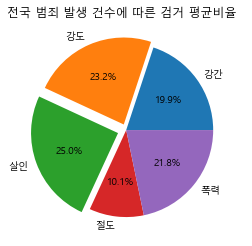

In [104]:
explode = [0,0.07,0.10,0,0]
plt.title('전국 범죄 발생 건수에 따른 검거 평균비율  ')
#발생 건수에 따른 살인과 강도 검거 비율이 1,2위이다. 

plt.pie(values, labels=labels, autopct = '%.1f%%', explode=explode )

In [145]:
#각 범죄별 최우수 검거 지역구 선정. 
#전체 범죄발생 검거율 
#crime_kk_m=crime_seoul2['강간검거율'].mean()
#crime_kd_m=crime_seoul2['강도검거율'].mean()
#crime_si_m=crime_seoul2['살인검거율'].mean()
#crime_jd_m=crime_seoul2['절도검거율'].mean()
#crime_pr_m=crime_seoul2['폭력검거율'].mean()

crime_ratio =crime_seoul2.filter(regex='(율)').columns
crime_ratio

crime_seoul_ratio= crime_seoul2[crime_ratio]
crime_seoul_ratio=crime_seoul_ratio

print(crime_seoul_ratio[crime_seoul_ratio['강간검거율']>77.62]['강간검거율'].idxmax()) #103.92 강간검거율 
print(crime_seoul_ratio[crime_seoul_ratio['강도검거율']>90.24]['강도검거율'].idxmax()) #185.71 강도검거율
print(crime_seoul_ratio[crime_seoul_ratio['살인검거율']>97.53]['살인검거율'].idxmax()) #166.66
print(crime_seoul_ratio[crime_seoul_ratio['절도검거율']>39.46]['절도검거율'].idxmax()) #60.11
print(crime_seoul_ratio[crime_seoul_ratio['폭력검거율']>84.72]['폭력검거율'].idxmax()) #88.63

#crime_kk_m:77.62102740638977
#crime_kd_m:90.24286824286827
#crime_si_m:97.53257853257855
#crime_jd_m:39.46726981309722
#crime_pr_m:84.72037513940185


도봉구
광진구
양천구
강서구
강북구


,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,
강남구,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,61.421320,100.000000,100.000000,36.525308,85.530665
